In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/oyuncu-csv/oyuncu.csv


![This is an image](https://icdn.benchwarmers.ie/wp-content/uploads/2016/05/uefa-champions-league-2015-2016-football-star-players.jpg)

# **LOADING LIBRARIES**

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
from statsmodels.tsa.statespace.sarimax import SARIMAX

import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
#import keras
from keras.layers import Dense, BatchNormalization
from keras.models import Sequential
#from keras.utils import to_categorical
#from keras.optimizers import SGD
#from keras.callbacks import EarlyStopping
#from keras.utils import np_utils
import itertools



warnings.filterwarnings('ignore')
import tensorflow as tf
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_log_error
import glob
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)



# **LOADING DATASET**

In [3]:
df=pd.read_csv("../input/oyuncu-csv/oyuncu.csv",index_col=0)
df.dropna(inplace=True)

# **FUNCTIONS**

In [4]:
def degisken_tiplerine_ayirma(data,cat_th,car_th):
   """
   Veri:data parametresi ili fonksiyona girilen verinin değişkenlerin sınıflandırılması.
   Parameters
   ----------
   data: pandas.DataFrame
   İşlem yapılacak veri seti
   cat_th:int
   categoric değişken threshold değeri
   car_th:int
   Cardinal değişkenler için threshold değeri
   Returns
   -------
    cat_deg:list
    categorik değişken listesi
    num_deg:list
    numeric değişken listesi
    car_deg:list
    categoric ama cardinal değişken listesi
   Examples
   -------
    df = dataset_yukle("breast_cancer")
    cat,num,car=degisken_tiplerine_ayirma(df,10,20)
   Notes
   -------
    cat_deg + num_deg + car_deg = toplam değişken sayısı
   """


   num_but_cat=[i for i in data.columns if data[i].dtypes !="O" and data[i].nunique() < cat_th]

   car_deg=[i for i in data.columns if data[i].dtypes == "O" and data[i].nunique() > car_th]

   num_deg=[i for i in data.columns if data[i].dtypes !="O" and i not in num_but_cat]

   cat_deg = [i for i in data.columns if data[i].dtypes == "O" and i not in car_deg]

   cat_deg = cat_deg+num_but_cat

   print(f"Dataset kolon/değişken sayısı: {data.shape[1]}")
   print(f"Dataset satır/veri sayısı: {data.shape[0]}")
   print("********************************************")
   print(f"Datasetin numeric değişken sayısı: {len(num_deg)}")
   print(f"Datasetin numeric değişkenler: {num_deg}")
   print("********************************************")
   print(f"Datasetin categoric değişken sayısı: {len(cat_deg)}")
   print(f"Datasetin categoric değişkenler: {cat_deg}")
   print("********************************************")
   print(f"Datasetin cardinal değişken sayısı: {len(car_deg)}")
   print(f"Datasetin cardinal değişkenler: {car_deg}")
   print("********************************************")

   return cat_deg,num_deg,car_deg


# **PREPROCESSING**

In [5]:
cat_deg,num_deg,car_deg=degisken_tiplerine_ayirma(df,10,20)
aybars=df.groupby('Player_name').mean()
aybars=aybars.reset_index()

Dataset kolon/değişken sayısı: 43
Dataset satır/veri sayısı: 142383
********************************************
Datasetin numeric değişken sayısı: 38
Datasetin numeric değişkenler: ['id', 'player_fifa_api_id', 'player_api_id', 'overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']
********************************************
Datasetin categoric değişken sayısı: 3
Datasetin categoric değişkenler: ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']
********************************************
Datasetin cardinal değişken sayısı: 2
Datase

In [6]:
cat_deg,num_deg,car_deg=degisken_tiplerine_ayirma(aybars,10,20)
kmeans = KMeans()
num_deg=[i for i in num_deg if i not in ['id', 'player_fifa_api_id', 'player_api_id']]
aybars[num_deg] = StandardScaler().fit_transform(aybars[num_deg])


Dataset kolon/değişken sayısı: 39
Dataset satır/veri sayısı: 8062
********************************************
Datasetin numeric değişken sayısı: 38
Datasetin numeric değişkenler: ['id', 'player_fifa_api_id', 'player_api_id', 'overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']
********************************************
Datasetin categoric değişken sayısı: 0
Datasetin categoric değişkenler: []
********************************************
Datasetin cardinal değişken sayısı: 1
Datasetin cardinal değişkenler: ['Player_name']
**********************

# **PCA METHOD**

In [7]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(aybars[num_deg])
df_pca=pd.DataFrame(data=df_pca,columns=["Feature_1","Feature_2"])
df_pca["Player_name"]=aybars["Player_name"]
df_pca["potential"]=aybars["potential"]

# **K-MEANS METHOD**

In [8]:
kmeans = KMeans(n_clusters=10)
k_fit = kmeans.fit(aybars[num_deg])

k_fit.n_clusters
k_fit.cluster_centers_
k_fit.labels_
k_fit.inertia_
aybars.head()
kumeler = kmeans.labels_
aybars["Sınıf"]=kumeler
aybars = pd.DataFrame(aybars)
aybars.head()

,Player_name,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,Sınıf
0,Aaron Appindangoye,3.000,218353.000,505942.000,-0.533,-0.787,-0.285,-0.239,0.931,0.002,-0.209,-0.399,-0.346,-0.536,0.649,-0.887,-0.566,-0.268,-0.451,-2.178,0.043,-0.333,-0.847,-1.024,0.843,-0.950,0.416,0.076,-0.549,-0.158,-0.423,0.874,0.806,0.992,-0.558,-0.363,-0.725,-0.558,-0.541,5
1,Aaron Cresswell,22.000,189615.000,155782.000,0.014,0.417,1.102,0.087,-0.213,0.128,-1.050,0.232,0.662,0.922,0.621,0.029,0.803,0.702,0.890,0.459,1.802,0.413,0.958,0.649,-1.356,0.189,0.366,0.401,-0.134,0.118,-0.021,1.154,0.943,1.174,-0.155,-0.492,-0.433,-0.377,-0.216,7
2,Aaron Doran,51.500,186170.000,162549.000,0.019,0.365,0.935,0.557,0.160,0.341,0.412,0.709,0.564,0.519,0.406,0.504,0.763,0.930,1.086,-1.713,1.446,0.209,0.124,0.476,0.306,0.418,-0.036,-0.206,0.490,0.972,0.519,-1.220,-1.412,-1.277,-0.042,-0.283,-0.214,-0.394,-0.180,3
3,Aaron Galindo,76.000,140161.000,30572.000,0.357,-0.231,0.254,-1.202,0.844,0.310,0.035,-0.101,-0.744,-0.425,0.434,0.126,-1.403,-1.259,-0.135,-0.736,-1.822,0.345,0.486,-0.897,1.088,-1.142,0.652,0.613,-1.074,-0.145,-0.850,1.215,1.036,1.004,-0.033,-0.325,0.109,-0.324,-0.384,0
4,Aaron Hughes,100.000,17725.000,23780.000,1.031,0.451,-0.505,-0.503,1.089,0.315,-0.880,-0.399,-0.294,-1.294,0.126,-0.084,-1.326,-1.147,-1.131,0.652,-0.032,-0.829,1.222,0.082,0.644,-1.552,0.678,1.488,-0.823,-0.668,-0.033,1.566,1.302,1.324,-0.394,-0.515,0.237,-0.215,-0.277,0


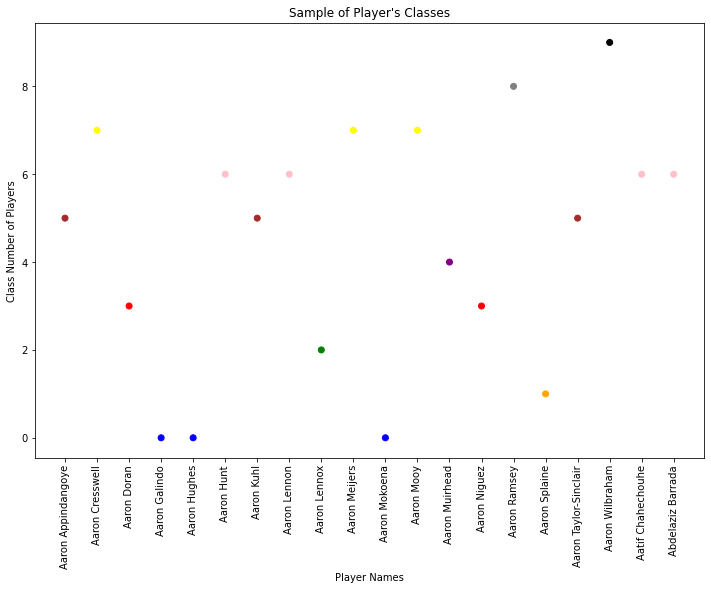

In [9]:
colors = {0:'blue', 1:'orange', 2:'green', 3:'red', 4:'purple', 5:'brown', 6:'pink',7:'yellow',8:'gray',9:'black'}
plt.figure(figsize=(12,8))
plt.scatter(aybars["Player_name"].head(20),aybars["Sınıf"].head(20),c=aybars['Sınıf'].head(20).map(colors))
plt.xticks(rotation=90)
plt.xlabel("Player Names")
plt.ylabel("Class Number of Players")
plt.title("Sample of Player's Classes")
plt.show()

 # **SAMPLES(20 PLAYER) OF EACH PLAYER GROP**

In [10]:
aybars[aybars["Sınıf"]==9].sort_values(by="potential",ascending=False).head(10)

,Player_name,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,Sınıf
3876,Hernan Crespo,70294.000,7512.000,35561.000,2.056,2.605,-0.510,2.067,2.028,0.400,1.936,0.841,1.045,-0.043,-1.794,1.357,0.318,0.176,-0.332,2.381,0.410,1.467,0.683,-0.108,0.954,1.330,-0.856,0.650,1.965,0.984,2.357,-1.334,-1.434,-1.538,-0.309,0.017,0.221,0.086,0.075,9
623,Andre Silva,11311.500,228941.000,388523.000,0.505,2.211,-1.197,1.172,0.762,-0.870,1.037,0.527,1.195,-0.883,-1.175,0.531,0.782,0.996,0.375,0.974,-0.403,1.211,0.196,0.427,0.957,0.066,1.038,-0.566,1.007,0.157,1.426,-1.122,-0.380,-1.489,-0.044,-0.204,-0.888,-0.336,-0.517,9
6697,Mauro Icardi,120911.500,201399.000,282770.000,1.385,2.191,-0.914,1.814,1.130,0.313,1.298,0.794,0.431,-0.155,-0.608,0.957,0.920,0.948,0.944,1.049,0.698,1.016,1.724,0.207,0.483,0.798,-0.719,-1.592,1.657,0.198,1.074,-1.309,-1.369,-1.309,-0.121,-0.487,-1.030,-0.615,-0.471,9
319,Aleksandar Mitrovic,5779.000,215716.000,351860.000,1.136,2.171,-1.565,1.687,1.393,0.244,1.315,0.544,-0.724,-0.256,-1.012,0.651,0.030,0.356,-0.457,0.744,-1.473,1.397,0.826,-0.039,1.445,1.181,0.499,-1.635,1.173,0.550,0.480,-1.133,-1.314,-1.163,-0.037,-0.330,-1.006,-0.656,-0.265,9
783,Anthony Martial,14516.500,211300.000,413557.000,0.716,2.144,-0.324,1.402,0.685,0.278,0.872,1.066,0.123,0.243,-0.552,0.848,1.499,1.686,1.354,0.437,0.744,0.850,1.152,-0.105,0.680,0.737,-1.270,-1.320,0.941,-0.098,1.176,-1.298,-1.459,-1.367,-0.381,-0.569,-0.856,-0.107,-0.364,9
6301,Mario Gomez,113760.500,150418.000,27326.000,2.591,2.137,0.681,2.140,1.890,0.731,1.974,0.914,0.889,-0.635,-0.693,1.050,0.607,1.073,0.078,2.241,0.004,1.611,1.251,0.115,1.783,1.332,1.103,-1.016,2.003,0.559,1.435,-1.231,-1.337,-1.304,-0.402,-0.376,-0.326,-0.424,-0.065,9
527,Alvaro Morata,9589.500,201153.000,213501.000,1.386,2.034,0.326,1.719,1.217,-0.004,1.539,0.937,1.192,-0.234,-1.135,1.025,0.601,1.039,0.180,0.880,-0.721,1.139,0.015,0.175,1.031,0.808,-1.046,-1.673,1.639,0.406,0.768,-1.386,-1.380,-1.403,-0.321,-0.770,-0.544,-0.632,-0.243,9
6306,Mario Mandzukic,113850.500,181783.000,75447.000,2.381,1.894,0.639,1.994,2.067,0.840,1.927,1.030,0.595,0.024,-1.113,1.141,0.795,1.010,0.741,2.297,0.099,1.372,1.858,1.336,1.532,1.142,1.627,-0.865,1.791,0.217,1.720,-1.219,-0.590,-0.683,-0.296,-0.482,-0.880,-0.479,-0.065,9
276,Alberto Paloschi,5042.000,186961.000,109121.000,1.396,1.872,-0.249,1.865,1.268,0.327,1.585,0.655,0.581,0.025,-1.476,0.987,1.080,0.904,1.263,1.545,0.636,0.824,1.811,0.557,0.647,-0.086,0.568,-1.332,1.653,-0.073,1.596,-1.264,-1.354,-1.169,-0.056,-0.035,-0.516,-0.155,-0.601,9
6024,Manolo Gabbiadini,108523.500,198683.000,172899.000,1.192,1.818,-0.216,1.537,1.004,0.528,1.524,0.921,1.105,1.410,-1.090,1.133,0.983,1.388,0.702,0.974,-0.682,1.440,1.058,0.689,0.489,1.303,0.542,-1.649,1.251,0.973,1.240,-1.159,-1.118,-1.134,-0.181,-0.352,-0.651,-0.744,-0.714,9


In [11]:
aybars[aybars["Sınıf"]==0].sort_values(by="potential",ascending=False).head(10)

,Player_name,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,Sınıf
7258,Nemanja Vidic,131138.500,140601.000,30865.000,2.979,2.449,-0.940,-0.768,2.154,0.419,-0.475,-0.736,-0.460,-0.223,0.467,0.136,-0.783,-0.477,-1.147,1.475,-0.620,-0.118,2.304,0.005,2.191,-1.183,2.037,1.843,-0.920,-0.063,0.378,2.021,1.923,1.766,-0.215,-0.529,0.191,-0.357,-0.475,0
4712,John Terry,84843.000,13732.000,30627.000,2.891,2.339,-0.614,-0.187,2.273,0.216,0.455,-0.738,-0.381,-0.892,0.571,0.060,-1.590,-1.197,-1.567,2.220,-0.674,0.026,1.320,0.440,1.855,-1.082,2.032,1.917,-0.270,0.313,0.388,1.978,1.885,1.812,-0.139,-0.507,-0.234,0.006,-0.338,0
991,Aymeric Laporte,18308.000,212218.000,411617.000,1.411,2.108,-1.450,-1.330,1.113,0.444,-1.062,-0.849,-0.086,0.484,1.436,0.329,-0.764,-0.524,-1.186,0.720,-1.389,-0.876,0.860,-0.343,1.006,-1.455,0.671,1.699,-1.253,-0.634,-1.417,1.536,1.503,1.493,-0.289,-0.337,-1.013,-0.139,-0.700,0
5474,Kurt Zouma,98418.500,204311.000,281207.000,1.117,2.096,-0.172,-0.093,1.139,-0.080,-0.056,-0.684,0.545,0.743,-0.125,0.338,0.317,0.619,-0.830,0.912,-1.116,-0.453,1.542,0.430,1.623,-0.234,0.942,1.242,-0.127,0.030,0.536,1.390,1.248,1.195,-0.091,-0.189,-0.936,-0.517,-0.136,0
4906,Jose Gimenez,88400.500,216460.000,474589.000,1.305,2.093,-0.425,-0.641,0.901,-0.140,-1.038,-1.002,-0.885,-0.241,0.166,-0.581,0.051,0.315,-0.675,-0.417,-0.919,0.773,1.812,0.464,1.180,-0.205,1.569,1.432,-1.833,-2.109,-1.169,1.550,1.508,1.508,-0.389,-0.380,-0.928,-0.443,-0.128,0
6751,Mehdi Benatia,121956.000,177509.000,46875.000,2.203,2.089,-0.404,-0.463,1.560,0.305,-1.187,-0.241,-1.031,-1.073,0.551,0.429,-0.007,0.048,-0.358,1.728,-1.112,0.004,1.236,0.775,1.476,-1.461,1.483,1.813,-0.813,-0.498,-0.449,1.886,1.701,1.673,-0.414,-0.659,-0.471,-0.486,-0.251,0
6590,Matija Nastasic,118808.000,205362.000,213485.000,1.359,2.080,-0.634,-1.211,1.235,0.428,-0.938,-1.601,-1.309,-1.001,0.333,0.262,0.141,0.357,-0.498,0.753,-0.996,-1.092,1.465,0.317,0.926,-1.738,0.682,1.480,-1.321,-1.141,-0.584,1.569,1.489,1.416,-0.283,-0.065,-0.694,-0.134,-0.267,0
7932,Phil Jones,143046.000,194957.000,186137.000,1.529,2.074,0.589,-0.218,1.093,1.154,0.399,-0.101,-0.781,-0.812,0.704,0.550,-0.044,0.463,-1.208,1.368,-0.062,0.497,1.810,0.898,0.674,0.293,1.355,1.420,-0.732,0.192,-0.391,1.615,1.492,1.509,-0.342,-0.484,-0.706,-0.011,-0.304,0
629,Andrea Barzagli,11466.000,137186.000,30902.000,2.676,2.069,-0.578,-0.996,1.348,0.570,-0.549,-0.209,-0.249,-0.468,0.807,0.405,0.499,0.570,-0.383,2.044,-0.024,-0.152,1.806,0.353,1.519,-0.852,1.209,2.138,-0.864,-0.005,0.066,2.043,1.875,1.846,-0.430,-0.535,-0.563,-0.499,-0.484,0
6414,Marquinhos,115746.000,207865.000,267365.000,1.327,2.045,-0.305,-0.820,1.099,0.188,-0.849,-0.078,-0.552,-0.788,0.865,0.456,0.649,0.720,-0.022,1.363,-0.017,-0.500,1.065,0.288,-0.360,-1.043,1.191,1.551,-1.286,-1.022,-1.282,1.603,1.488,1.549,-0.533,-0.669,-0.574,-0.401,-0.211,0


In [12]:
kmeans = KMeans(n_clusters=10)
k_fit = kmeans.fit(df_pca[["Feature_1","Feature_2"]])

k_fit.n_clusters
k_fit.cluster_centers_
k_fit.labels_
k_fit.inertia_
aybars.head()
kumeler = kmeans.labels_
df_pca["Sınıf"]=kumeler
df_pca = pd.DataFrame(df_pca)

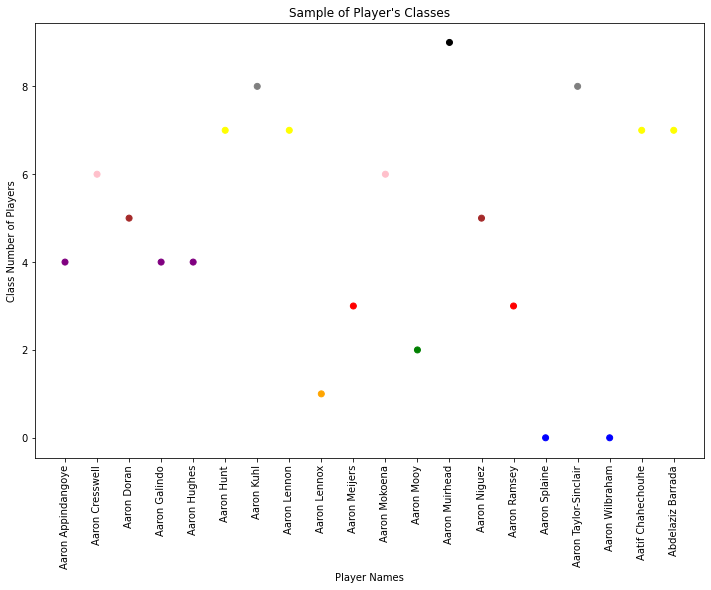

In [13]:
colors = {0:'blue', 1:'orange', 2:'green', 3:'red', 4:'purple', 5:'brown', 6:'pink',7:'yellow',8:'gray',9:'black'}
plt.figure(figsize=(12,8))
plt.scatter(df_pca["Player_name"].head(20),df_pca["Sınıf"].head(20),c=df_pca['Sınıf'].head(20).map(colors))
plt.xticks(rotation=90)
plt.xlabel("Player Names")
plt.ylabel("Class Number of Players")
plt.title("Sample of Player's Classes")
plt.show()

 # **SAMPLES(20 PLAYER) OF EACH PLAYER GROP AFTER PCA**

In [14]:
df_pca[df_pca["Sınıf"]==8].sort_values(by="potential",ascending=False).head(10)

,Feature_1,Feature_2,Player_name,potential,Sınıf
2315,-0.702,0.155,Dele Alli,1.599,8
461,-0.304,1.601,Alexis Blin,1.323,8
964,-0.162,1.112,Assane Diousse,1.171,8
2998,-0.317,-0.474,Federico Mattiello,1.131,8
7691,-0.609,1.365,Pascal Bieler,1.106,8
4150,-0.592,1.759,Jack Robinson,1.075,8
1818,0.693,1.644,Cristian Manea,0.931,8
3533,-0.022,1.973,Gilberto Junior,0.856,8
5129,-0.483,2.035,Juri Judt,0.798,8
5455,0.911,1.367,Krystian Bielik,0.769,8


In [15]:
df_pca[df_pca["Sınıf"]==2].sort_values(by="potential",ascending=False).head(10)

,Feature_1,Feature_2,Player_name,potential,Sınıf
1277,-3.296,-1.599,Breel Embolo,2.311,2
623,-1.943,-1.842,Andre Silva,2.211,2
5650,-1.835,0.279,Levin Mete Oztunali,2.181,2
2534,-1.998,-0.466,Donny van de Beek,1.789,2
1978,-2.952,-1.899,Daniel Moreira,1.760,2
5556,-2.848,-1.778,Leandro Damiao,1.758,2
1602,-2.835,-1.838,Christian Benteke,1.712,2
7248,-3.106,-1.717,Nelson Oliveira,1.672,2
726,-3.046,-0.530,Andy Carroll,1.653,2
839,-3.434,-1.378,Antonio Langella,1.643,2


# **PLAYER DISTRIBUTION**

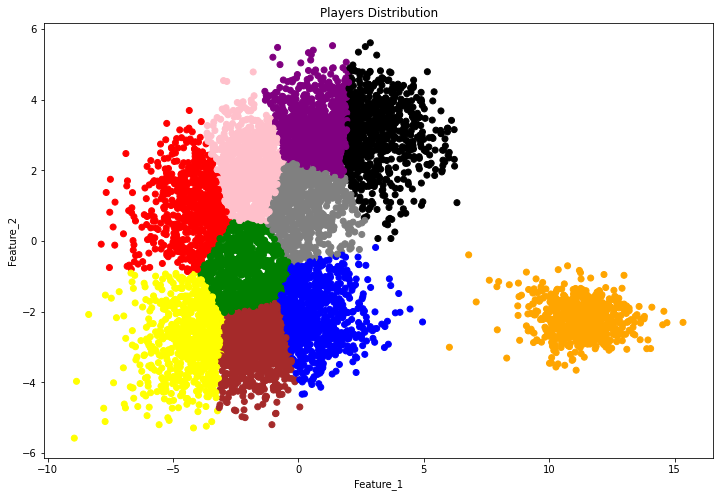

In [16]:
colors = {0:'blue', 1:'orange', 2:'green', 3:'red', 4:'purple', 5:'brown', 6:'pink',7:'yellow',8:'gray',9:'black'}
plt.figure(figsize=(12,8))
plt.scatter(df_pca["Feature_1"],df_pca["Feature_2"],c=df_pca['Sınıf'].map(colors),label=["Creative players","Strong Stoper","Passer Stoper","Goal Keepers","Second Forward","AMC_MC","Defender","Athletic Wings"])
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.title("Players Distribution")
#plt.legend(["Creative players","Strong Stoper","Passer Stoper","Goal Keepers","Second Forward","AMC_MC","Defender","Athletic Wings"]))
plt.show()

# **USER FUNCTION FOR TRANSFER MARKET**
* We created a function for transfar market team. They can find a alternative player group for their team player. 

In [17]:
player_name="Luka Modric" #Player who you are looking for his alternatives

def alternative_player(player_name,df):
    player_class=int(df[df["Player_name"]==player_name]["Sınıf"].values)
    print(player_class)
    return df[df["Sınıf"]==player_class].sort_values(by="potential",ascending=False).head(50)

alternative_player(player_name,df_pca)

7


,Feature_1,Feature_2,Player_name,potential,Sınıf
5700,-8.933,-5.578,Lionel Messi,4.044,7
1839,-8.845,-3.970,Cristiano Ronaldo,3.738,7
7276,-6.893,-4.722,Neymar,3.262,7
690,-7.694,-1.529,Andres Iniesta,3.227,7
6300,-6.243,-3.686,Mario Goetze,3.155,7
4230,-6.882,-2.754,James Rodriguez,3.121,7
3228,-7.760,-4.732,Franck Ribery,3.115,7
2604,-6.700,-4.127,Eden Hazard,2.979,7
2218,-7.367,-4.012,David Silva,2.975,7
886,-7.704,-5.109,Arjen Robben,2.884,7
